In [1]:
cd ..

/home/jovyan/gt_ml_project_1


In [2]:
%run __init__.py

In [3]:
%run src/load_data.py

In [4]:
from lib.benchmark import run_model, plot_results
from lib.benchmark import pipeline_basic, \
                        pipeline_scale, \
                        pipeline_deskew
from sklearn.dummy import DummyClassifier        
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm


# Adult 

In [33]:
test_results_2 = {}
percentages = [1,2,3,4,5,7,10,15,20,25,30,40,50,60,70,80,90,100]

tests = [('always_true', 'basic', pipeline_basic(DummyClassifier, {'strategy':'constant','constant':1})),
         ('always_true', 'scaled', pipeline_scale(DummyClassifier, {'strategy':'constant','constant':1})),
         ('always_true', 'deskewed', pipeline_deskew(DummyClassifier, {'strategy':'constant','constant':1})),
#          ('logistic regression', 'basic', pipeline_basic(LogisticRegression)),
#          ('logistic regression', 'scaled', pipeline_scale(LogisticRegression)),
#          ('logistic regression', 'deskewed', pipeline_deskew(LogisticRegression)),
#          ('knn', 'basic', pipeline_basic(KNeighborsClassifier)),
#          ('knn', 'scaled', pipeline_scale(KNeighborsClassifier)),
#          ('knn', 'deskewed', pipeline_deskew(KNeighborsClassifier)),
#          ('decision tree', 'basic', pipeline_basic(DecisionTreeClassifier)),
#          ('decision tree', 'scaled', pipeline_scale(DecisionTreeClassifier)),
#          ('decision tree', 'deskewed', pipeline_deskew(DecisionTreeClassifier)),
        ]

models = list(set([t[0] for t in tests]))

In [38]:
len(adult_train_labels)

25071

In [36]:
data['adult']['train']['labels'] = (data['adult']['train']['labels'] == 0).astype(int)

In [6]:
for t in tests:
    for n in tqdm(percentages):
        test_name = "{} {} {}".format(t[0], t[1], n)
        data_set = t[1]
        model = t[2]
        test_results[test_name] = run_model(model, test_name, n,
                                                data['adult']['train']['engineered'],
                                                data['adult']['train']['labels'])

100%|██████████| 18/18 [00:03<00:00,  4.94it/s]


In [42]:
for t in tests:
    for n in tqdm(percentages):
        test_name = "{} {} {}".format(t[0], t[1], n)
        data_set = t[1]
        model = t[2]
        test_results[test_name] = run_model(model, test_name, n,
                                                data['adult']['train']['engineered'],
                                                data['adult']['train']['labels'])

100%|██████████| 18/18 [00:02<00:00,  6.64it/s]


In [7]:
test_results = pd.DataFrame(test_results).T.sort_values('n')

# Madelon Data Benchmarking

In [8]:
test_results_madelon = {}

In [9]:
for t in tests:
    for n in tqdm(percentages):
        test_name = "{} {} {}".format(t[0], t[1], n)
        #data_set = t[1]
        model = t[2]
        test_results_madelon[test_name] = run_model(model, test_name, n,
                                                    data['madelon']['train']['raw_data'],
                                                    data['madelon']['train']['labels'])

100%|██████████| 18/18 [00:02<00:00,  6.21it/s]


In [10]:
test_results_madelon = pd.DataFrame(test_results_madelon).T.sort_values('n')

## Results

In [44]:
test_results

,accuracy_test_score,accuracy_train_score,f1_test_score,f1_train_score,fit_time,model_name,n,n_pcnt,test_pred_time,train_pred_time
always_true basic 1,0.240747,0.218085,0,0,0.000209332,always_true basic 1,188,1,0.00353956,0.00156331
always_true deskewed 1,0.240747,0.218085,0,0,0.00282145,always_true deskewed 1,188,1,0.0211065,0.0011034
always_true scaled 1,0.240747,0.218085,0,0,0.00192213,always_true scaled 1,188,1,0.0228417,0.000715494
logistic regression deskewed 1,0.768985,0.946809,0.546082,0.875,0.00634837,logistic regression deskewed 1,188,1,0.0312259,0.00135136
logistic regression basic 1,0.822272,0.893617,0.566874,0.722222,0.00438213,logistic regression basic 1,188,1,0.00222445,0.000561953
decision tree basic 1,0.762125,1,0.460759,1,0.00832701,decision tree basic 1,188,1,0.00208092,0.000481606
logistic regression scaled 1,0.804084,0.941489,0.590667,0.864198,0.00457978,logistic regression scaled 1,188,1,0.00549006,0.000563622
decision tree deskewed 1,0.766911,1,0.478028,1,0.00232553,decision tree deskewed 1,188,1,0.0199163,0.000891209
knn scaled 1,0.772176,0.87234,0.467164,0.666667,0.00139093,knn scaled 1,188,1,0.186432,0.00596166
knn deskewed 1,0.773931,0.87234,0.452261,0.666667,0.00203085,knn deskewed 1,188,1,0.190573,0.00671005


In [21]:
models = ['always_true', 'logistic regression', 'knn', 'decision tree']

In [16]:
models = list(set(models ))

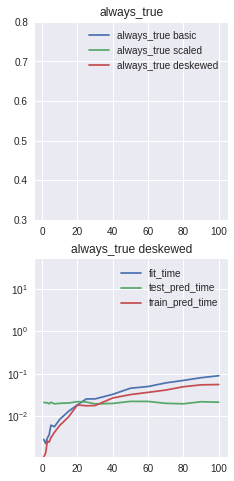

In [43]:
plot_results(test_results, tests, models, ylim=(0.3,0.8))

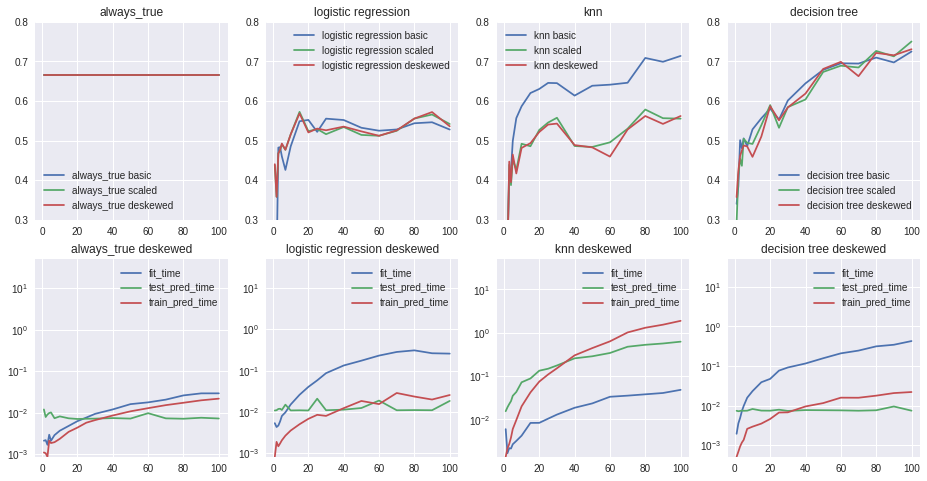

In [23]:
plot_results(test_results_madelon, tests, models, ylim=(0.3,0.8))

In [30]:
test_results_madelon

,accuracy_test_score,accuracy_train_score,f1_test_score,f1_train_score,fit_time,model_name,n,n_pcnt,test_pred_time,train_pred_time
always_true basic 1,0.5,0.333333,0.666667,0.5,0.000292778,always_true basic 1,15,1,9.15527e-05,0.000155926
always_true deskewed 1,0.5,0.333333,0.666667,0.5,0.00211811,always_true deskewed 1,15,1,0.0119834,0.00110435
always_true scaled 1,0.5,0.333333,0.666667,0.5,0.000803471,always_true scaled 1,15,1,0.00174499,0.000254869
logistic regression deskewed 1,0.542,1,0.440098,1,0.00529742,logistic regression deskewed 1,15,1,0.0107458,0.0008111
logistic regression basic 1,0.498,1,0.237082,1,0.00550604,logistic regression basic 1,15,1,0.0119536,0.00031209
decision tree basic 1,0.518,1,0.339726,1,0.000981569,decision tree basic 1,15,1,0.000513792,0.000190258
logistic regression scaled 1,0.542,1,0.437346,1,0.00184751,logistic regression scaled 1,15,1,0.00688457,0.000344753
decision tree deskewed 1,0.488,1,0.356784,1,0.00195193,decision tree deskewed 1,15,1,0.0074358,0.000512362
knn scaled 1,0.518,0.8,0.20462,0.571429,0.000947714,knn scaled 1,15,1,0.00970554,0.000910759
knn deskewed 1,0.516,0.733333,0.198675,0.333333,0.00594234,knn deskewed 1,15,1,0.0154154,0.00136638


In [53]:
test_results_madelon.loc[tests]['f1_test_score']

always_true basic 100               0.666667
always_true deskewed 100            0.666667
always_true scaled 100              0.666667
decision tree basic 100               0.7251
decision tree deskewed 100          0.730924
decision tree scaled 100            0.750491
knn basic 100                       0.713987
knn deskewed 100                    0.561983
knn scaled 100                      0.555324
logistic regression basic 100       0.527778
logistic regression deskewed 100       0.536
logistic regression scaled 100      0.541833
Name: f1_test_score, dtype: object

In [49]:
tests = sorted(['knn deskewed 100',
'knn basic 100',
'decision tree scaled 100',
'logistic regression deskewed 100',
'decision tree deskewed 100',
'decision tree basic 100',
'knn scaled 100',
'always_true scaled 100',
'always_true deskewed 100',
'logistic regression basic 100',
'always_true basic 100',
'logistic regression scaled 100',])

In [52]:
test_results.loc[tests]['f1_test_score']

always_true basic 100                      0
always_true deskewed 100                   0
always_true scaled 100                     0
decision tree basic 100             0.603862
decision tree deskewed 100          0.604852
decision tree scaled 100            0.606786
knn basic 100                       0.639247
knn deskewed 100                    0.601266
knn scaled 100                      0.600704
logistic regression basic 100       0.652577
logistic regression deskewed 100    0.663493
logistic regression scaled 100      0.663493
Name: f1_test_score, dtype: object